In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score ,KFold
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#Reading Data

In [ ]:
diamonds = pd.read_csv('diamonds_data.csv')

In [ ]:
df = diamonds.copy()

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53936 non-null  float64
 1   cut      53929 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53935 non-null  object 
 4   depth    53938 non-null  float64
 5   table    53939 non-null  float64
 6   price    53934 non-null  float64
 7   x        53935 non-null  float64
 8   y        53937 non-null  float64
 9   z        53936 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [ ]:
df['color']

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [ ]:
df.isnull().sum()

carat       4
cut        11
color       2
clarity     5
depth       2
table       1
price       6
x           5
y           3
z           4
dtype: int64

In [ ]:
df = df.apply(lambda x: x.fillna(x.mode().iloc[0]) if x.dtype == 'object' else x, axis=0)


In [ ]:
df.fillna(df.mean(), inplace=True)


<ipython-input-12-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797954,61.749590,57.457229,3932.869136,5.731179,5.734519,3.538731
std,0.474006,1.432286,2.234466,3989.269805,1.121742,1.142134,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.duplicated().sum()

146

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

#Data analysis & Preprocessing

In [ ]:
df['clarity'].value_counts()

SI1     13034
VS2     12227
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

In [ ]:
dic1 = {
    "I1":0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}

df['clarity']= df['clarity'].map(dic1)

In [ ]:
df['clarity'].value_counts()

2    13034
3    12227
1     9150
4     8156
5     5056
6     3647
7     1784
0      740
Name: clarity, dtype: int64

In [ ]:
df['cut'].value_counts()

Ideal        21497
Premium      13745
Very Good    12067
Good          4888
Fair          1597
Name: cut, dtype: int64

In [ ]:
dic2 = {
    "Ideal":0,
    "Fair": 1,
    "Good": 2,
    "Very Good": 3,
    "Premium": 4,
}

df['cut']= df['cut'].map(dic2)


In [ ]:
df['cut'].value_counts()

0    21497
4    13745
3    12067
2     4888
1     1597
Name: cut, dtype: int64

In [ ]:
df['color'].value_counts()

G    11264
E     9775
F     9520
H     8272
D     6755
I     5407
J     2801
Name: color, dtype: int64

In [ ]:
dic3 = {
    "G":0,
    "E": 1,
    "F": 2,
    "H": 3,
    "D": 4,
    "I": 5,
    "J": 6,
}

df['color']= df['color'].map(dic3)

In [ ]:
df['color'].value_counts()

0    11264
1     9775
2     9520
3     8272
4     6755
5     5407
6     2801
Name: color, dtype: int64

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,1,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,2,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,4,5,3,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,6,1,63.3,58.0,335.0,4.34,4.35,2.75


<Axes: >

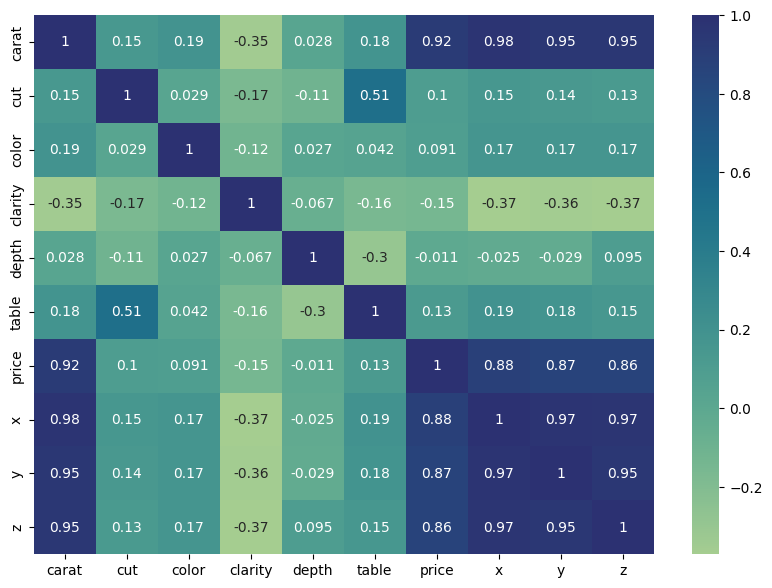

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='crest')

In [ ]:
df = df.drop('color', axis=1)
df = df.drop('depth', axis=1)


# Model Training and Testing

In [ ]:
X=df.drop(columns=['price'])
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(43035, 7)

In [ ]:
X_test.shape

(10759, 7)

#Helpers

In [ ]:
def pred_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("MAE For Train: ", metrics.mean_absolute_error(y_train, y_pred_train))
    print("MAE For Test: ", metrics.mean_absolute_error(y_test, y_pred_test))

    print("R2 Score For Train: ", r2_score(y_train, y_pred_train))
    print("R2 Score For Test: ", r2_score(y_test, y_pred_test))

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Model with train_test

## Random Forest Model


In [ ]:
rf = RandomForestRegressor()
pred_model(rf, X_train, y_train, X_test, y_test)

MAE For Train:  195.3991896213768
MAE For Test:  511.6403168033698
R2 Score For Train:  0.9914587337820153
R2 Score For Test:  0.9402983027251767


##LinearRegression

In [ ]:
lr = LinearRegression()
model = pred_model(lr, X_train, y_train, X_test, y_test)

MAE For Train:  868.1936368438787
MAE For Test:  852.8240539519135
R2 Score For Train:  0.8883391549400597
R2 Score For Test:  0.8815428842228731


##Lasso

In [ ]:
Ls= Lasso(alpha=1.0)
pred_model(Ls, X_train, y_train, X_test, y_test)

MAE For Train:  870.3925842893645
MAE For Test:  854.7391869849606
R2 Score For Train:  0.8883221002450665
R2 Score For Test:  0.8823035180891738


##Ridge

In [ ]:
Rid= Ridge(alpha=1.0)
pred_model(Rid, X_train, y_train, X_test, y_test)

MAE For Train:  868.5266058837238
MAE For Test:  853.127714346171
R2 Score For Train:  0.8883388242042034
R2 Score For Test:  0.8816130534214441


##tree

In [ ]:
clf = tree.DecisionTreeRegressor(max_depth=3)
pred_model(clf, X_train, y_train, X_test, y_test)

MAE For Train:  774.2602058335028
MAE For Test:  766.3077556823578
R2 Score For Train:  0.8885540601753098
R2 Score For Test:  0.8875572762065174


#Model with cross validation

## Random Forest Model


In [ ]:
rf = RandomForestRegressor()

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 519.89
Average R2 Score: 0.94


##LinearRegression

In [ ]:
lr = LinearRegression()

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 868.63
Average R2 Score: 0.89


##Lasso

In [ ]:
Ls= Lasso(alpha=1.0)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(Ls, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Ls, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 870.29
Average R2 Score: 0.89


##Ridge

In [ ]:
Rid= Ridge(alpha=1.0)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(Rid, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(Rid, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 868.57
Average R2 Score: 0.89


##DecisionTreeRegressor

In [ ]:
clf = tree.DecisionTreeRegressor(max_depth=3)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(clf, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 772.72
Average R2 Score: 0.89


#Conclusion
The price of diamonds is influenced by a combination of factors, commonly known as the "Four Cs": carat weight, cut, color, and clarity. Each of these factors plays a role in determining the overall quality and value of a diamond, but in this dataset, all of the Four Cs have no effect, it's possible that the dataset lacks diversity in terms of the ranges covered by each of the Four Cs or that other factors, not included in the dataset, are influencing diamond prices. It's also essential to consider potential outliers, as they could skew the analysis.

Random forest is the best between the five models (DecisionTreeRegressor, Ridge, Lasso , Linear regression, Random forest)